In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from sklearn.utils import shuffle
from PIL import Image

#define functions to pre process the images
def normalize(img):
    a=0
    b=1
    minClr=0
    maxClr=255
    return a+(((img-minClr)*(b-a))/(maxClr-minClr))

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    return image1

def pre_proc_one_image(image):
    image = normalize(image)
    image= image[55:, :,:]
    image = cv2.resize(image, (50,50), interpolation = cv2.INTER_AREA)
    return image

def flip(image):
    flipped=np.ndarray((image.shape))
    flipped[:,:,0] = np.fliplr(image[:,:,0])
    flipped[:,:,1] = np.fliplr(image[:,:,1])
    flipped[:,:,2] = np.fliplr(image[:,:,2])
    return flipped

In [2]:
#-----------------------load images + process them / load labels--------
#takes the csv file and creates a list with the images and another list with the respective steering angles


X_train = []
y_train = []

path_to_data = 'data/data/'
csv_file = 'driving_log.csv'
#csv_file = 'driving_log_(augmented).csv'
#csv_file = 'small.csv'


with open(path_to_data + csv_file) as csv_file:
    csv_file.readline()
    flag=0
    stangle=0
    
    for i in csv_file:

        splitado=i.split(',')
        stangle=float(splitado[3])
        if stangle==0:
            #ignore if more than 3 zero steering angles in a row.
            if flag!=3:
                image = cv2.imread(path_to_data + splitado[0])            
    
                y_train.append(stangle)
                image=augment_brightness_camera_images(image)
                X_train.append(pre_proc_one_image(image))
                flag=flag+1
        
            else:
                pass
        else:
            #use centre, left and right camera and add an additional flip image/angle to generate more data
            image = cv2.imread(path_to_data + splitado[0])
            image1 = plt.imread(path_to_data + i.split(', ')[1])
            image2 = plt.imread(path_to_data + i.split(', ')[2])
    
            y_train.append(stangle)
            image=augment_brightness_camera_images(image)
            X_train.append(pre_proc_one_image(image))

            y_train.append(-1*stangle)
            X_train.append(pre_proc_one_image(flip(image)))
            
            
            y_train.append(stangle)
            image1=augment_brightness_camera_images(image1)
            X_train.append(pre_proc_one_image(image1))
            
            y_train.append(-1*stangle)
            X_train.append(pre_proc_one_image(flip(image1)))
            
            y_train.append(stangle)
            image2=augment_brightness_camera_images(image2)
            X_train.append(pre_proc_one_image(image2))
            
            y_train.append(-1*stangle)
            X_train.append(pre_proc_one_image(flip(image2)))
            flag=0
        
        

        
        
print("done")

done


image example:
(25297, 50, 50, 3)


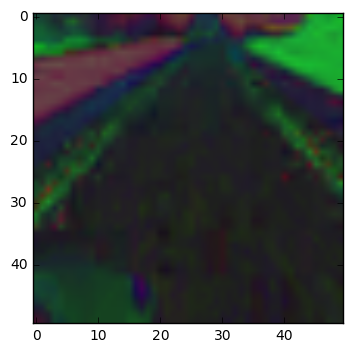

In [3]:
#converts lists to a numpy array and prints an example of a new image

X_train = np.array(X_train,dtype=np.float16)
y_train = np.array(y_train,dtype=np.float16)

print("image example:")
print(X_train.shape)
image=X_train[3]


plt.imshow(image)
plt.show()

#print(X_train.nbytes)


In [4]:
#shuffles data and reserves 10% of it to be used as the test set

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, y_train = shuffle(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=50)


In [5]:
#defines model architecture

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization


model = Sequential()

model.add(BatchNormalization(input_shape=(50, 50,3),axis=1))

model.add(Convolution2D(64, 3, 3, border_mode='valid', input_shape=(50, 50,3)))

model.add(Activation('elu'))
model.add(MaxPooling2D((2, 2)))


model.add(Convolution2D(32, 3, 3))
model.add(Activation('elu'))
model.add(MaxPooling2D((2, 2)))


model.add(Convolution2D(16, 3, 3))
model.add(Activation('elu'))
model.add(MaxPooling2D((2, 2)))


model.add(Convolution2D(8, 3, 3))
model.add(Activation('elu'))


model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(160))
model.add(Activation('elu'))

model.add(Dense(160))
model.add(Activation('elu'))

model.add(Dense(160))
model.add(Activation('elu'))

model.add(Dense(128))
model.add(Activation('elu'))

model.add(Dense(128))
model.add(Activation('elu'))

model.add(Dense(64))
model.add(Activation('elu'))

model.add(Dense(64))
model.add(Activation('elu'))

model.add(Dense(32))
model.add(Activation('elu'))

model.add(Dense(32))
model.add(Activation('elu'))

model.add(Dropout(0.5))
          
model.add(Dense(1))


Using TensorFlow backend.


In [6]:
# model.count_params()

# model.summary()


In [7]:
#nvidia
# from keras.models import Sequential
# from keras.layers.core import Dense, Activation, Flatten, Dropout, Lambda
# from keras.layers import ELU
# from keras.layers.convolutional import Convolution2D
# from keras.layers.pooling import MaxPooling2D
# from keras.layers.normalization import BatchNormalization

# model = Sequential()
# model.add(Lambda(lambda x: x/127.5 - 1.,
#         input_shape=(70, 70,3),
#         output_shape=(70, 70,3)))
# model.add(Convolution2D(16, 8, 8, subsample=(4, 4), border_mode="same"))
# model.add(ELU())
# model.add(Convolution2D(32, 5, 5, subsample=(2, 2), border_mode="same"))
# model.add(ELU())
# model.add(Convolution2D(64, 5, 5, subsample=(2, 2), border_mode="same"))
# model.add(Flatten())
# model.add(Dropout(.2))
# model.add(ELU())
# model.add(Dense(512))
# model.add(Dropout(.5))
# model.add(ELU())
# model.add(Dense(1))


In [8]:
# from keras.models import Sequential
# from keras.layers.core import Dense, Activation, Flatten, Dropout, Lambda
# from keras.layers import ELU
# from keras.layers.convolutional import Convolution2D
# from keras.layers.pooling import MaxPooling2D

# model = Sequential()

# model.add(Lambda(lambda x: x/127.5 - 1.,
#         input_shape=(70, 70,3),
#         output_shape=(70, 70,3)))

# model.add(Convolution2D(24, 5, 5, border_mode="valid", subsample=(2, 2), activation="elu"))
# model.add(Convolution2D(36, 5, 5, border_mode="valid", subsample=(2, 2), activation="elu"))
# model.add(Convolution2D(48, 5, 5, border_mode="valid", subsample=(2, 2), activation="elu"))
# model.add(Convolution2D(64, 3, 3, border_mode="valid", subsample=(1, 1), activation="elu"))
# model.add(Convolution2D(64, 3, 3, border_mode="valid", subsample=(1, 1), activation="elu"))

# model.add(Flatten())

# model.add(Dense(1164, activation="elu"))
# model.add(Dense(100, activation="elu"))
# model.add(Dense(50, activation="elu"))
# model.add(Dense(10, activation="elu"))
# model.add(Dense(1, activation="linear"))

In [9]:
#train the model

model.compile('adam', 'mean_squared_error', ['accuracy'])
history = model.fit(X_train, y_train, nb_epoch=5, validation_split=0.2)



Train on 18213 samples, validate on 4554 samples
Epoch 1/5
18213/18213 [==============================] - 938s - loss: 0.0217 - acc: 0.0531 - val_loss: 0.0158 - val_acc: 0.0556
Epoch 2/5
18213/18213 [==============================] - 934s - loss: 0.0170 - acc: 0.0531 - val_loss: 0.0152 - val_acc: 0.0556
Epoch 3/5
18213/18213 [==============================] - 930s - loss: 0.0157 - acc: 0.0531 - val_loss: 0.0152 - val_acc: 0.0556
Epoch 4/5
18213/18213 [==============================] - 989s - loss: 0.0151 - acc: 0.0531 - val_loss: 0.0140 - val_acc: 0.0556
Epoch 5/5
18213/18213 [==============================] - 1090s - loss: 0.0144 - acc: 0.0531 - val_loss: 0.0136 - val_acc: 0.0556


In [10]:
metrics = model.evaluate(X_test, y_test)
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))

2530/2530 [==============================] - 66s    
loss: 0.013101968980530504
acc: 0.05375494071146245


In [11]:
#saves model weights/info into files

from keras.models import model_from_json
import json

json_string = model.to_json()
with open('model.json', 'w') as outfile:
    json.dump(json_string, outfile)

# model = model_from_json(json_string)

model.save_weights('model.h5')

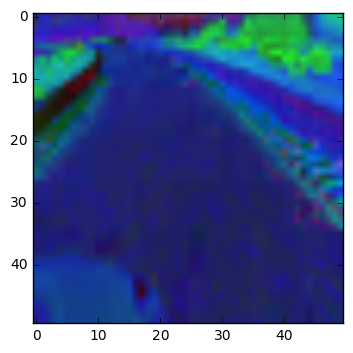

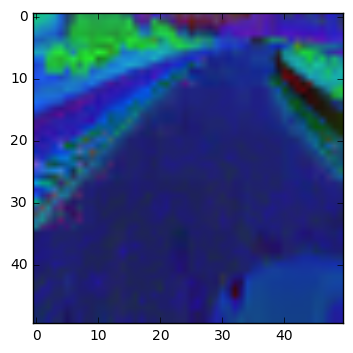

-0.19594712555408478


In [12]:
image=X_train[3]
plt.imshow(image)
plt.show()


flipped_img = np.ndarray((image.shape))
flipped_img[:,:,0] = np.fliplr(image[:,:,0])
flipped_img[:,:,1] = np.fliplr(image[:,:,1])
flipped_img[:,:,2] = np.fliplr(image[:,:,2])
plt.imshow(flipped_img)
plt.show()


image=image[None,:,:,:]

steering_angle = float(model.predict(image, batch_size=1))
print(steering_angle)